- enrolldt : Enrollment Date
- price: Membership price
- downpmt: Downpayment
- monthdue: Months Due
- pmttype: Payment Type (1: Credit Card, 3: Cash , 4: Check, 5: Debit Card)
- use: Usage
- age: Age of customer
- gender: Gender of customer(1: Male, 2: Female)
- default: 1: Default, 0 Non-Default

In [314]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [315]:
import os

In [316]:
cd

/home/jovyan


In [317]:
print(os.getcwd())

/home/jovyan


In [318]:
print(os.listdir())

['.bashrc', '.profile', '.bash_logout', '.cache', 'model_evaluation_results.xlsx', 'work', '.jupyter', '.ipython', '.local', '.npm', '.conda', '.config', '.wget-hsts']


In [360]:
data = pd.read_csv("/home/jovyan/work/leadership/verizon_data.csv")

In [361]:
raw_data = data.copy()

In [362]:
data.head(5)

,year,month,day,price,downpmt,monthdue,payment_left,monthly_payment,pmttype,credit_score,age,gender,default
0,2020,1,12,2178.85,250.00,6.0,1928.85,321.475000,4,1,0,2,0
1,2020,6,15,1543.65,1543.65,6.0,0.00,0.000000,1,0,0,2,0
2,2020,4,19,1107.67,125.00,5.0,982.67,196.534000,1,0,0,2,0
3,2020,3,17,950.44,237.61,9.0,712.83,79.203333,5,0,0,1,0
4,2020,8,21,1436.00,250.00,9.0,1186.00,131.777778,3,0,0,2,0


In [363]:
(data['pmttype']==2).sum()

0

In [364]:
len(data.columns)

13

In [365]:
data.info

<bound method DataFrame.info of        year  month  day    price  downpmt  monthdue  payment_left  \
0      2020      1   12  2178.85   250.00       6.0       1928.85   
1      2020      6   15  1543.65  1543.65       6.0          0.00   
2      2020      4   19  1107.67   125.00       5.0        982.67   
3      2020      3   17   950.44   237.61       9.0        712.83   
4      2020      8   21  1436.00   250.00       9.0       1186.00   
...     ...    ...  ...      ...      ...       ...           ...   
24828  2021      8    2     0.00     0.00       4.0          0.00   
24829  2021     11   14     0.00     0.00      10.0          0.00   
24830  2021      5    6     0.00     0.00      10.0          0.00   
24831  2021     11   13     0.00     0.00       0.0          0.00   
24832  2021     10   15     0.00     0.00       9.5          0.00   

       monthly_payment  pmttype  credit_score  age  gender  default  
0           321.475000        4             1    0       2        0  

In [366]:
data.describe()

,year,month,day,price,downpmt,monthdue,payment_left,monthly_payment,pmttype,credit_score,age,gender,default
count,24833.000000,24833.000000,24833.000000,24833.000000,24833.000000,24833.000000,24833.000000,24833.000000,24833.000000,24833.000000,24833.000000,24833.000000,24833.000000
mean,2020.601377,6.499013,13.041397,1003.756083,199.799561,8.288312,803.956522,144.342202,3.093223,1.944952,29.199372,1.498087,0.115049
std,0.489625,3.458227,7.169510,439.278060,335.465403,7.109477,472.899790,190.091249,1.559949,2.315778,13.278939,0.500006,0.319087
min,2020.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,2020.000000,3.000000,7.000000,699.000000,49.000000,5.500000,536.820000,61.451579,1.000000,0.000000,22.000000,1.000000,0.000000
50%,2021.000000,6.000000,13.000000,999.000000,100.000000,6.000000,855.000000,116.941176,3.000000,1.000000,28.000000,1.000000,0.000000
75%,2021.000000,10.000000,19.000000,1249.000000,175.000000,9.000000,1116.880000,184.907273,4.000000,3.000000,36.000000,2.000000,0.000000
max,2021.000000,12.000000,25.000000,9371.250000,9371.250000,120.000000,5045.000000,19639.750000,5.000000,8.000000,99.000000,2.000000,1.000000


## Confusion about the column age

### Data 

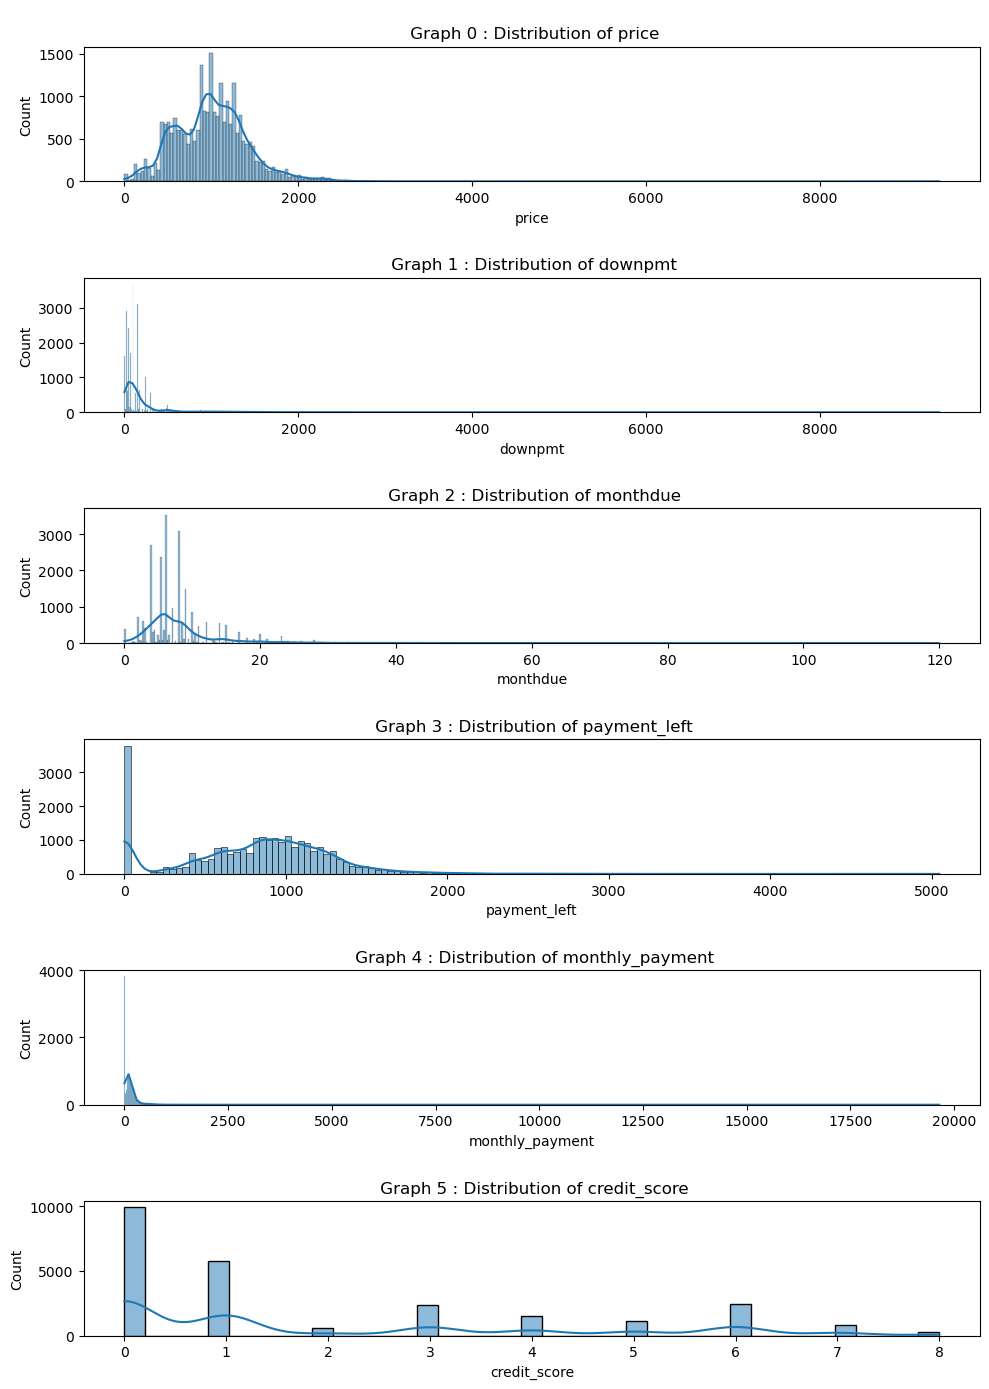

In [367]:
# Distribution plots for key numerical variables
num_cols = ['price','downpmt', 'monthdue', 'payment_left', 'monthly_payment', 'credit_score']

# Plotting the distribution
plt.figure(figsize=(10,14))
for i, col in enumerate(num_cols):
    plt.subplot(6,1, i+1)
    sns.histplot(data[col], kde=True) #kde for clear data distribution line 
    plt.title(f'\n Graph {i} : Distribution of {col}')
plt.tight_layout()
plt.show()

### Checking outliers

<font color='red'><b>See if any columns have outliers. Try removing them and making EDA plots again

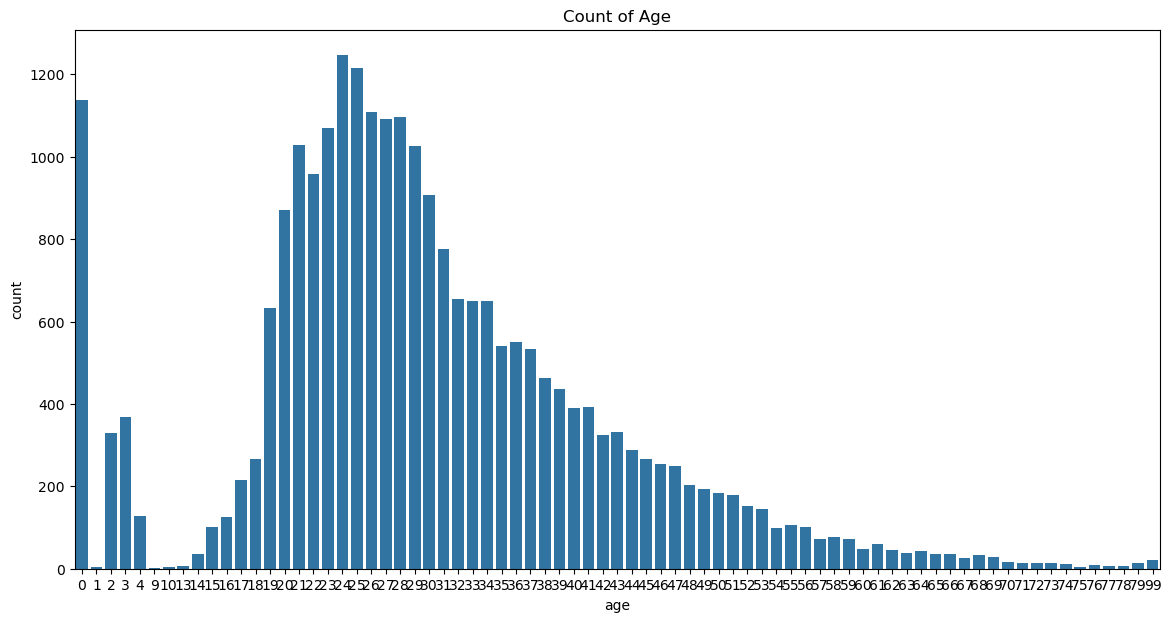

In [368]:
# Count plot for the 'age' variable
plt.figure(figsize=(14, 7))
sns.countplot(x='age', data=data)
plt.title('Count of Age')
plt.show()

In [369]:
print('Age less than 13 : ',(data['age']<10).sum())
print('Age equals 99 : ',(data['age']== 99).sum())
print('Age more than 80 : ',(data['age']>80).sum())

Age less than 13 :  1969
Age equals 99 :  20
Age more than 80 :  20


In [370]:
#Cleaning data 
data = data[(data['age'] >= 10) & (data['age'] <= 80)]

In [371]:
data.isna().sum()

year               0
month              0
day                0
price              0
downpmt            0
monthdue           0
payment_left       0
monthly_payment    0
pmttype            0
credit_score       0
age                0
gender             0
default            0
dtype: int64

In [372]:
#Duplicate rows 
data.duplicated().sum()

2

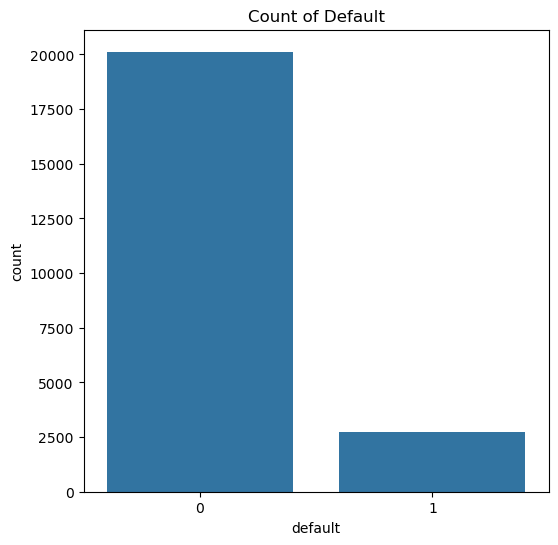

In [373]:
# Count plot for the 'default' variable
plt.figure(figsize=(6, 6))
sns.countplot(x='default', data=data)
plt.title('Count of Default')
plt.show()


In [374]:
# perectage of default :  
print('defaulters = ',(data['default'] == 1).sum())
print('non-defaulters = ',(data['default'] == 0).sum())
print('% of defaulters = ',(data['default'] == 1).sum()/(data['default'] == 0).sum()*100)
#(data['default'] == 1).count()/(data['default'] == 0).count()

defaulters =  2722
non-defaulters =  20122
% of defaulters =  13.527482357618528


### Credit score vs defaults no.

<font color='red'><b> Can you identify certain individuals that tend to default more than others based on the above EDA?

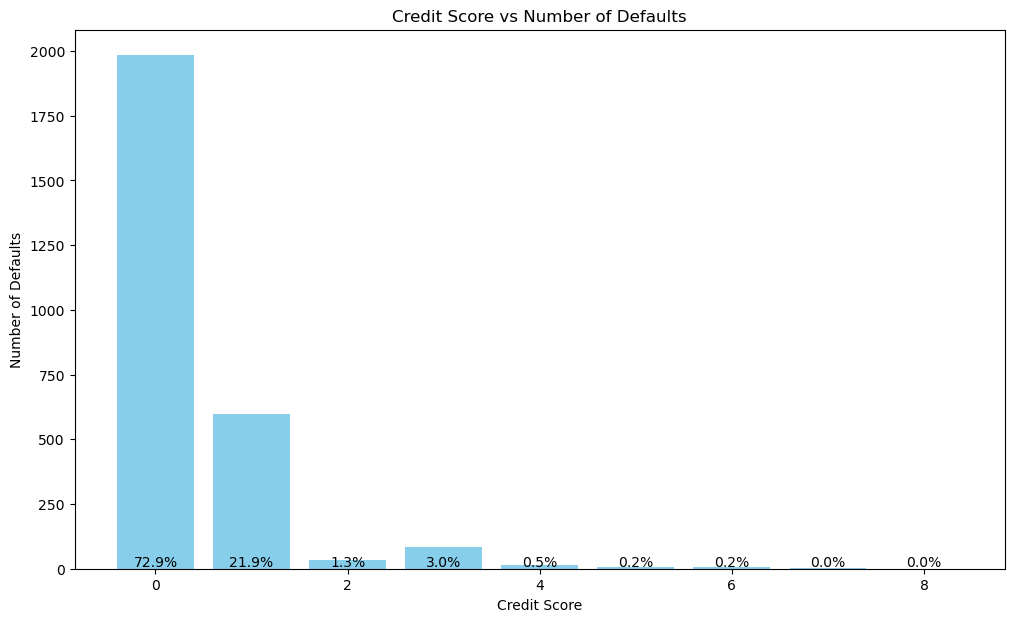

In [375]:
credit_score_vs_default = data.groupby('credit_score')['default'].sum()
total_defaults = data['default'].sum()
credit_score_percentage = (credit_score_vs_default / total_defaults) * 100


# bar plot
plt.figure(figsize=(12,7))

bars = plt.bar(credit_score_vs_default.index, credit_score_vs_default, color='skyblue')

# Add percentages below each bar
for bar, percentage in zip(bars, credit_score_percentage):
    plt.text(bar.get_x() + bar.get_width() / 2, -1.5, f'{percentage:.1f}%', ha='center', va='bottom')


plt.title('Credit Score vs Number of Defaults')
plt.xlabel('Credit Score')
plt.ylabel('Number of Defaults')
plt.xticks(rotation=0)
plt.show()

### Payment type vs Defaults

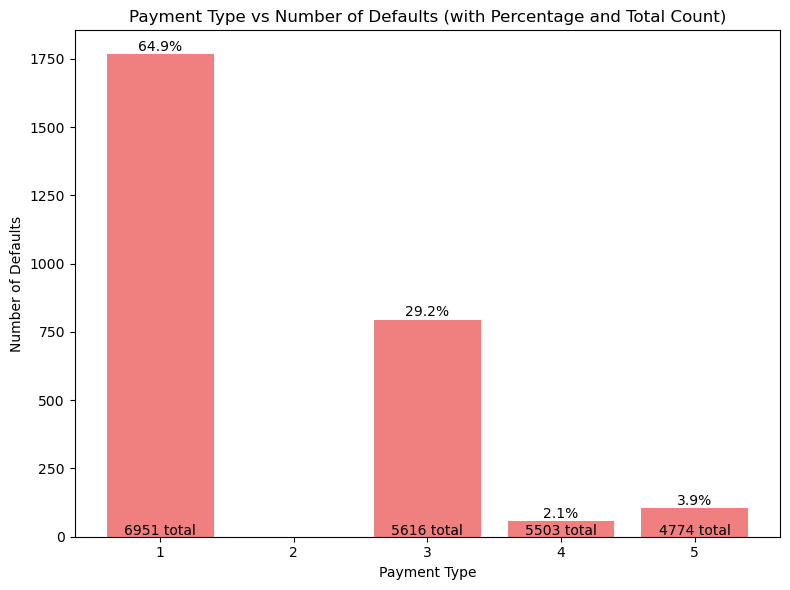

In [376]:
# payment type grouping
payment_type_vs_default = data.groupby('pmttype')['default'].sum()

# Count total number of occurrences for each payment type
payment_type_count = data['pmttype'].value_counts()

# Calculate percentage of defaults for each payment type
payment_type_percentage = (payment_type_vs_default / total_defaults) * 100

# Plot the graph for payment type vs number of defaults
plt.figure(figsize=(8, 6))
bars = plt.bar(payment_type_vs_default.index, payment_type_vs_default, color='lightcoral')

# Add percentages above each bar
for bar, percentage in zip(bars, payment_type_percentage):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{percentage:.1f}%', ha='center', va='bottom')

# Add total counts of each payment type below each bar
for bar, count in zip(bars, payment_type_count):
    plt.text(bar.get_x() + bar.get_width() / 2, -5, f'{count} total', ha='center', va='bottom')

plt.title('Payment Type vs Number of Defaults (with Percentage and Total Count)')
plt.xlabel('Payment Type')
plt.ylabel('Number of Defaults')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [377]:
(data['pmttype']==2).sum()

0

### Payment left vs default

In [378]:
data['payment_left'].max()

3890.75

/tmp/ipykernel_982/2303847075.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['payment_left_binned'] = pd.cut(data['payment_left'], bins=bins, labels=labels)


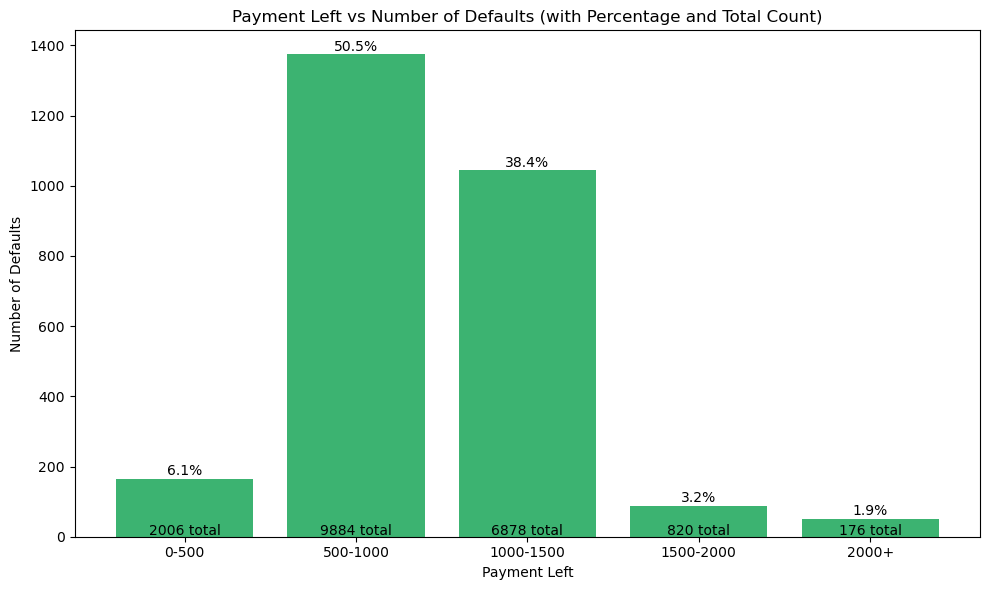

In [379]:

bins = [0, 500, 1000, 1500, 2000, data['payment_left'].max()]
labels = ['0-500', '500-1000', '1000-1500', '1500-2000', '2000+']

# Create a new column to represent binned payment_left values
data['payment_left_binned'] = pd.cut(data['payment_left'], bins=bins, labels=labels)

# Group by the binned payment_left values and count the number of defaults
payment_left_vs_default = data.groupby('payment_left_binned')['default'].sum()

# Count the total occurrences for each payment_left bin
payment_left_count = data['payment_left_binned'].value_counts(sort=False)

# Calculate the percentage of defaults for each payment_left bin
payment_left_percentage = (payment_left_vs_default / total_defaults) * 100

# Plot the graph for payment_left vs number of defaults
plt.figure(figsize=(10, 6))
bars = plt.bar(payment_left_vs_default.index, payment_left_vs_default, color='mediumseagreen')

# Add percentages above each bar
for bar, percentage in zip(bars, payment_left_percentage):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{percentage:.1f}%', ha='center', va='bottom')

# Add total counts of each payment_left bin below each bar
for bar, count in zip(bars, payment_left_count):
    plt.text(bar.get_x() + bar.get_width() / 2, -5, f'{count} total', ha='center', va='bottom')

plt.title('Payment Left vs Number of Defaults (with Percentage and Total Count)')
plt.xlabel('Payment Left')
plt.ylabel('Number of Defaults')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [380]:
data.drop('payment_left_binned', axis=1, inplace=True)

/tmp/ipykernel_982/195771932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('payment_left_binned', axis=1, inplace=True)


### Correlation

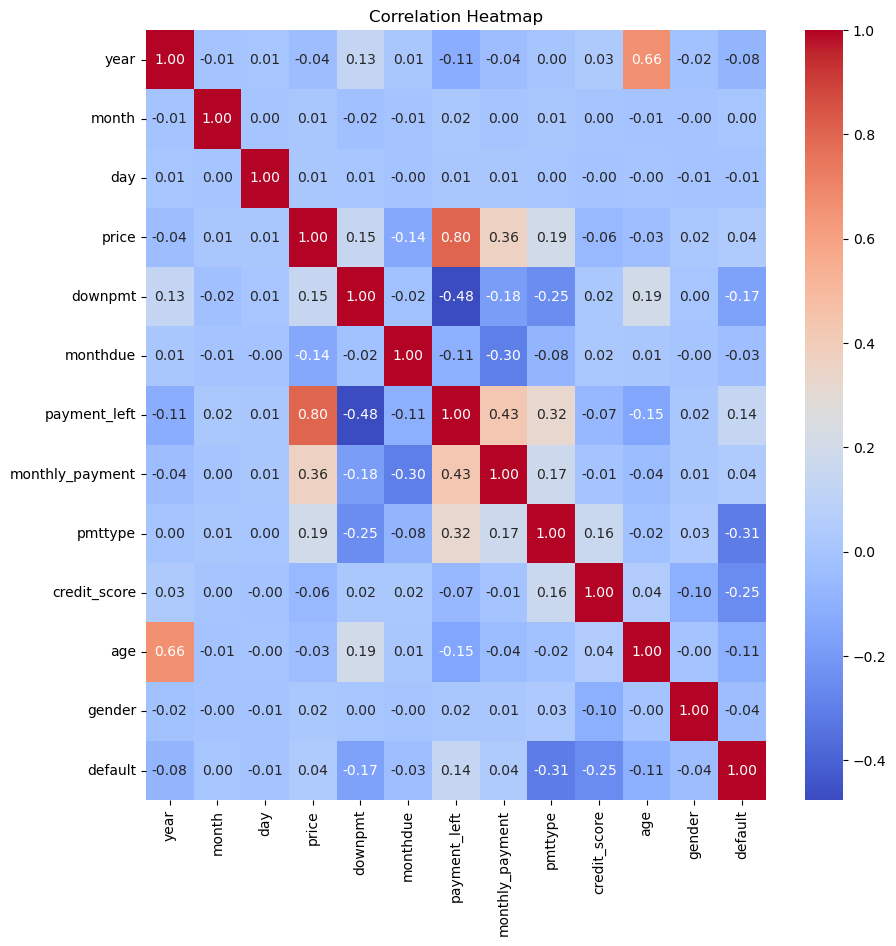

In [381]:
# Correlation matrix for numeric variables
corr_matrix = data.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [382]:
corr_matrix>0.7

,year,month,day,price,downpmt,monthdue,payment_left,monthly_payment,pmttype,credit_score,age,gender,default
year,True,False,False,False,False,False,False,False,False,False,False,False,False
month,False,True,False,False,False,False,False,False,False,False,False,False,False
day,False,False,True,False,False,False,False,False,False,False,False,False,False
price,False,False,False,True,False,False,True,False,False,False,False,False,False
downpmt,False,False,False,False,True,False,False,False,False,False,False,False,False
monthdue,False,False,False,False,False,True,False,False,False,False,False,False,False
payment_left,False,False,False,True,False,False,True,False,False,False,False,False,False
monthly_payment,False,False,False,False,False,False,False,True,False,False,False,False,False
pmttype,False,False,False,False,False,False,False,False,True,False,False,False,False
credit_score,False,False,False,False,False,False,False,False,False,True,False,False,False


### Correlation is >0.7 only for age-year, payment_left-downpayment, price-payment_left

### Models

In [399]:
X = data.drop(columns=['default'])
y = data['default']

## Target and features

In [400]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## STANDARISED FEATURES

In [401]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## LOGISTIC REGRESSION

In [386]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("\nConfusion Matrix for Logistic Regression Model:\n\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report for Logistic Regression Model:\n\n", classification_report(y_test, y_pred_lr))


Confusion Matrix for Logistic Regression Model:

 [[5825  229]
 [ 414  386]]

Classification Report for Logistic Regression Model:

               precision    recall  f1-score   support

           0       0.93      0.96      0.95      6054
           1       0.63      0.48      0.55       800

    accuracy                           0.91      6854
   macro avg       0.78      0.72      0.75      6854
weighted avg       0.90      0.91      0.90      6854



## Random Forest

In [387]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nConfusion Matrix for Random Forest Model:\n\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report for Random Forest Model:\n\n", classification_report(y_test, y_pred_rf))


Confusion Matrix for Random Forest Model:

 [[5854  200]
 [ 395  405]]

Classification Report for Random Forest Model:

               precision    recall  f1-score   support

           0       0.94      0.97      0.95      6054
           1       0.67      0.51      0.58       800

    accuracy                           0.91      6854
   macro avg       0.80      0.74      0.76      6854
weighted avg       0.91      0.91      0.91      6854



### Feature Importance

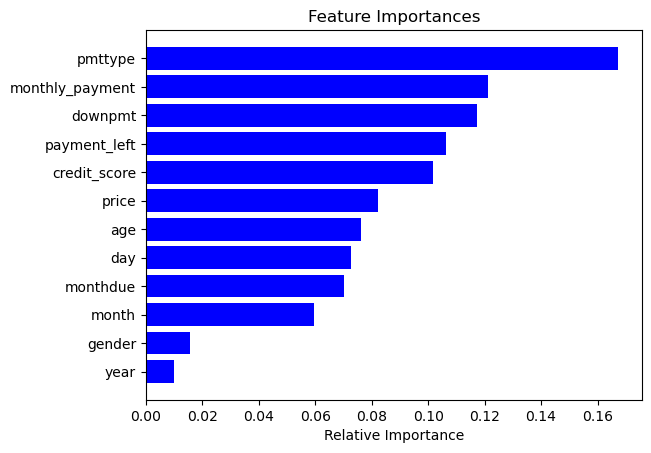

In [388]:
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<font color='red'><b> We have used Logistic Regression, Decision Tree and Random Forest to predict if a customer will default or not. Try 2 other models of your choice and evaluate them on 2 metrics of your choice that we haven't used so far

In [389]:
import lightgbm as lgb
model3 = lgb.LGBMClassifier()
model3.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1922, number of negative: 14068
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000857 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1329
[LightGBM] [Info] Number of data points in the train set: 15990, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120200 -> initscore=-1.990536
[LightGBM] [Info] Start training from score -1.990536


LGBMClassifier()

In [390]:
y_pred = model3.predict(X_test)
y_pred_probability = model3.predict_proba(X_test)[:, 1]


In [391]:
# Combine the predictions and probabilities into a DataFrame
df_predictions = pd.DataFrame({
    'Predicted': y_pred,
    'Predicted_Probability': y_pred_probability
})

# Print the DataFrame
print(df_predictions.head())

   Predicted  Predicted_Probability
0          0               0.010300
1          0               0.053483
2          0               0.000120
3          0               0.000453
4          0               0.000855


### LGBM

In [392]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

# 1. Read the data
df = raw_data.copy()

# 2. Data preprocessing
# Combine the year, month, and day columns into a datetime object
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# Invert the target variable
df['default'] = df['default'].map({1: 0, 0: 1})  # Replace 1 with 0 and 0 with 1

# Select the required columns
features = ['price', 'downpmt', 'monthdue', 'payment_left', 'monthly_payment', 'pmttype', 'credit_score', 'age', 'gender']
target = 'default'

# Separate features and target variable
X = df[features]
y = df[target]

# One-hot encoding for categorical variables
categorical_features = ['pmttype', 'credit_score', 'age', 'gender']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# 3. Build the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Pipeline that includes preprocessing and model training
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', lgb.LGBMClassifier())
])

# 4. Train the model
pipeline.fit(X_train, y_train)

# Income estimation function
def estimate_income(true_positives, true_negatives, false_positives, false_negatives):
    income_from_tp = true_positives * 250
    income_from_tn = true_negatives * 1000
    loss_from_fp = false_positives * -1000
    loss_from_fn = false_negatives * -250
    total_income = income_from_tp + income_from_tn + loss_from_fp + loss_from_fn
    total_profit = income_from_tp + income_from_tn
    total_loss = loss_from_fp + loss_from_fn
    return total_income, total_profit, total_loss

# Model evaluation and income estimation function
def evaluate_and_estimate(pipeline, X_test, y_test, threshold):
    # Make predictions
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]  # Get the probability of the positive class

    # Apply the threshold
    y_pred_binary = (y_pred_proba >= threshold).astype(int)

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_binary)

    # Calculate true positives, true negatives, false positives, and false negatives
    true_positives = conf_matrix[1, 1]  # True positives
    true_negatives = conf_matrix[0, 0]  # True negatives
    false_positives = conf_matrix[0, 1]  # False positives
    false_negatives = conf_matrix[1, 0]  # False negatives

    # Calculate and return the estimated income
    estimated_income, estimated_profit, estimated_loss = estimate_income(true_positives, true_negatives, false_positives, false_negatives)
    return {
        'Threshold': threshold,
        'True Positives': true_positives,
        'True Negatives': true_negatives,
        'False Positives': false_positives,
        'False Negatives': false_negatives,
        'Estimated Income': estimated_income,
        'Estimated Profit': estimated_profit,
        'Estimated Loss': estimated_loss
    }


# Set the threshold range
thresholds = np.arange(0.2, 0.96, 0.01)

# List to store the results
results = []

# Loop over the thresholds and evaluate the model
for threshold in thresholds:
    result = evaluate_and_estimate(pipeline, X_test, y_test, threshold)
    results.append(result)

# Convert the results to a DataFrame
df_results = pd.DataFrame(results)

# Save the DataFrame to an Excel file
df_results.to_excel('model_evaluation_results.xlsx', index=False)

print(df_results)

[LightGBM] [Info] Number of positive: 17565, number of negative: 2301
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1347
[LightGBM] [Info] Number of data points in the train set: 19866, number of used features: 80
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.884174 -> initscore=2.032564
[LightGBM] [Info] Start training from score 2.032564
    Threshold  True Positives  True Negatives  False Positives  \
0        0.20            4395              83              473   
1        0.21            4395              87              469   
2        0.22            4394              94              462   
3        0.23            4392             101              455   
4        0.24            4388             109              447   
..        ...             ...             ...    

### KNN

In [398]:
print(len(X_train_scaled))
print(len(y_train))

15990
19866


In [402]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report



# Initialize the KNN model with a typical choice of 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = knn.predict(X_test_scaled)

# Evaluate the model using accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Detailed classification report for additional metrics
classification_report_knn = classification_report(y_test, y_pred)

In [403]:
print(classification_report_knn)

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      6054
           1       0.51      0.44      0.47       800

    accuracy                           0.89      6854
   macro avg       0.72      0.69      0.71      6854
weighted avg       0.88      0.89      0.88      6854



<font color='red'><b>For your business case which is more important - accuracy or generalization? Why?

<font color='red'><b>How much does feature importance in Random Forest help in explainability to stakeholders? <br>

<font color='red'><b>Are these accuracies good enough and give the business value or the ROI they estimated? If not, what else will you do to improve accuracies to get higher business value?

<font color='red'><b>What other data set can you use for this project?

<font color='red'><b>What other pre processing or processing can be done to imporove the model?

<font color='red'><b>What other advanced algorithms would you want to try?